##### Imports

In [56]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from models.BaselineModel import Baseline_mb
from models.MasterModel import MasterModel
from models.JitterModel import Jitter_model
from functions.get_min_max_dict import get_min_max_dict
from functions.data_gather import data_gather
from functions.get_dataset import get_dataset, normalize
from visualization.compare_plot import plot_results
from visualization.two_dim_hist import Create2d, KDE
from functions.load_model import load_model
from sklearn.metrics import mean_squared_error
import numpy as np
max_count=100


In [54]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>


##### Path

In [ ]:
ds_path_baseline = 'data/baseline_data_sim_cv'
ds_path_master = 'data/all_data_mb_cv'
ds_path_sim = 'data/all_data_sim_cv'
ds_path_jitter = 'data/jitter_data_mb_cv'

sim_path_test = 'data/all_data_sim_test_cv'

##### Load Datasets

In [ ]:
ds_test_baseline = get_dataset(ds_path_baseline)
ds_test_jitter = get_dataset(ds_path_jitter)
ds_test_master = get_dataset(ds_path_master).map(normalize)

ds_test_sim = get_dataset('',additional_ds=sim_path_test).map(normalize)

##### Models

In [ ]:
# Baseline
baseline_model = load_model(Baseline_mb(),tf.data.Dataset.load(f"{ds_path_baseline}/0/validation", compression="GZIP"),'ckpt/Baseline_mb/')
base_original,base_predicted,_ = data_gather(ds_test_baseline,baseline_model,max_count=max_count);

In [ ]:
# JitterModel

jitter_model = load_model(Jitter_model(),ds_test_jitter,'ckpt/JitterModel/');

jitter_original,jitter_predicted,_ = data_gather(ds_test_jitter,jitter_model,max_count=max_count);

In [7]:
# MasterModel

master_model = load_model(MasterModel(),ds_test_master,'ckpt/ck/')
original,predicted,mean = data_gather(ds_test_master,master_model,max_count=max_count);

IntProgress(value=0, bar_style='success', description='Loading:')

In [8]:
# MasterModel_old

old_model = load_model(MasterModel(),ds_test_master,'ckpt/MasterModel/')
original_old,predicted_old,mean_old = data_gather(ds_test_master,old_model,max_count=max_count);

IntProgress(value=0, bar_style='success', description='Loading:')

#### Visualization

In [ ]:
# plot_results(original[0],predicted[0],'old_delay_orig',save=True, x_label='Próbka',y_label='Opóźnienie [ms]')

# plot_results(original[1],predicted[1],'old_jitter_orig',save=True, x_label='Próbka',y_label='Fluktuacje [ms]')

# plot_results(original[2],predicted[2],'old_drop_orig',save=True, x_label='Próbka',y_label='Utracone pakiety')

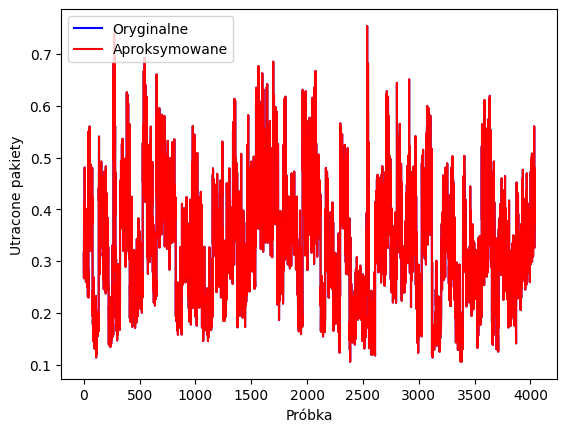

In [17]:
plot_results(mean_old,mean,'old_drop_orig',save=False, x_label='Próbka',y_label='Utracone pakiety')

In [162]:
import seaborn as sns
import matplotlib.lines as mlines
def KDE(mean,y_origin,y_predicted,save: bool = False,saveName = '',data_label1='data1',data_label2='data2',xlabel='',ylabel=''):
  fig, ax = plt.subplots()
  handles = []
  sns.set_style("white")
  sns.kdeplot(x=mean,y=y_origin,cmap="summer", fill=False,levels=10, linewidths=2,alpha=.5,label=data_label1,ax=ax)
  handles.append(mlines.Line2D([], [], color='red', label=data_label1))
  sns.kdeplot(x=mean,y=y_predicted,cmap="autumn", fill=False,levels=10, linewidths=2,alpha=.5,label=data_label2,ax=ax)
  handles.append(mlines.Line2D([], [], color='green', label=data_label2))
  ax.legend(handles = handles)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  if save:
    plt.savefig(f'assets/{saveName}.pdf')

In [219]:
import seaborn as sns
import matplotlib.lines as mlines
def KDE_new(mean,y_origin,y_predicted,save: bool = False,saveName = '',data_label1='data1',data_label2='data2',xlabel='',ylabel=''):
  fig, ax = plt.subplots()
  handles = []
  sns.set_style("white")
  sns.kdeplot(y_origin, fill=False,label=data_label1,ax=ax,log_scale=True)
  sns.kdeplot(y_predicted, fill=False,levels=10,label=data_label2,ax=ax,log_scale=True)
  # sns.kdeplot(original_old[0], fill=False,levels=10,label='Oryginał',ax=ax,log_scale=True)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.legend()
  if save:
    plt.savefig(f'assets/{saveName}.pdf')

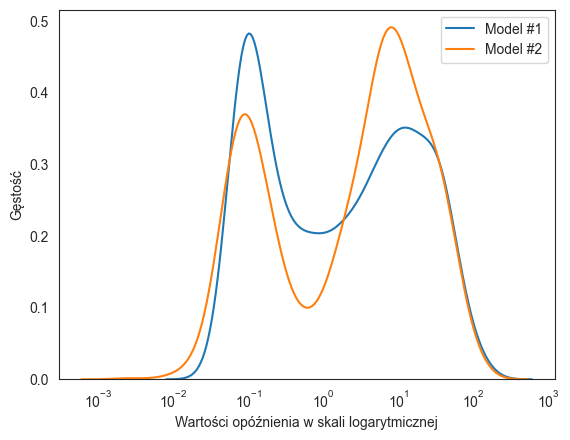

In [220]:
KDE_new(mean,predicted_old[0],predicted[0],saveName='old_vs_new_delay',data_label1="Model #1",data_label2="Model #2",xlabel="Wartości opóźnienia w skali logarytmicznej",ylabel="Gęstość",save=True)
# KDE_new(mean,predicted_old[1],predicted[1],saveName='old_vs_new_jitter',data_label1="Model #1",data_label2="Model #2",xlabel="Wartości fluktuacji w skali logarytmicznej",ylabel="Gęstość",save=True)
# KDE_new(mean,predicted_old[2],predicted[2],saveName='old_vs_new_drop',data_label1="Model #1",data_label2="Model #2",xlabel="Wartości strat pakietów w skali logarytmicznej",ylabel="Gęstość",save=True)

# Create2d(mean,predicted_old[0],predicted[0],bins=(10, 10),title='Porównanie rzeczywistych i aproksymowanych wartości \n w zależności od średniej zajętości na połączeniach',save=False)


In [14]:
master_rmse_delay = np.round(mean_squared_error(original[0], predicted[0]),decimals=2)
master_rmse_jitter = np.round(mean_squared_error(original[1], predicted[1]),decimals=2)
master_rmse_drop = np.round(mean_squared_error(original[2], predicted[2]),decimals=2)

In [ ]:
baseline_rmse = mean_squared_error(base_original[0], base_predicted[0])
print(f"Delay Baseline RMSE: {baseline_rmse}")
master_rmse = mean_squared_error(original[0], predicted[0])
print(f"Master Model Delay RMSE: {master_rmse}")

In [ ]:
jitter_rmse = mean_squared_error(jitter_original[0], jitter_predicted[0])
print(f"Jitter Baseline RMSE: {jitter_rmse}")
master_rmse = mean_squared_error(original[1], predicted[1])
print(f"Master Model Jitter RMSE: {master_rmse}")

In [16]:
old_rmse_delay = np.round(mean_squared_error(original_old[0], predicted_old[0]),decimals=2)
old_rmse_jitter = np.round(mean_squared_error(original_old[1], predicted_old[1]),decimals=2)
old_rmse_drop = np.round(mean_squared_error(original_old[2], predicted_old[2]),decimals=2)
print(f"Old Delay RMSE: {old_rmse_delay}")
print(f"Master Model Delay RMSE: {master_rmse_delay}")
print("----------------//////////////----------------")
print(f"Old Jitter RMSE: {old_rmse_jitter}")
print(f"Master Model jitter RMSE: {master_rmse_jitter}")
print("----------------//////////////----------------")
print(f"Old Drop RMSE: {old_rmse_drop}")
print(f"Master Model Drop RMSE: {master_rmse_drop}")
print("----------------//////////////----------------")
print(f"Old Sum RMSE: {old_rmse_drop+old_rmse_drop+old_rmse_delay}")
print(f"Master Model Sum RMSE: {master_rmse_drop+master_rmse_jitter+master_rmse_delay}")

Old Delay RMSE: 90.98
Master Model Delay RMSE: 38.81
----------------//////////////----------------
Old Jitter RMSE: 2.3
Master Model jitter RMSE: 1.07
----------------//////////////----------------
Old Drop RMSE: 11.7
Master Model Drop RMSE: 4.87
----------------//////////////----------------
Old Sum RMSE: 114.38
Master Model Sum RMSE: 44.75
